In [1]:
!pip install requests-oauthlib

In [3]:
import requests
from requests_oauthlib import OAuth1
import pandas as pd
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import f_regression
import joblib

In [81]:
# API Key and Secret
CONSUMER_KEY = '0C5DA5C29CF4CC8F5D8C4E9526FE66BB'
CONSUMER_SECRET = '79CE0FA3FE92F1ACBB2BA8FDF9EB1907'

# Access Token and Secret
ACCESS_TOKEN = 'C5760BF6B34754DD9DFE3B78C176D7A9'
ACCESS_TOKEN_SECRET = 'AEA7C1F78D2592EE20F13A804ECB88E4'

# According to TradeMe API doc, it requires OAuth1 
auth = OAuth1(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
url = 'https://api.tmsandbox.co.nz/v1/Search/Property/Residential.json'

In [83]:
# Auckland region ID = 1 (AI)
params = {'region': 1,'rows': 3, 'page': 1}
response = requests.get(url, params=params, auth=auth, timeout=15)
# Try to catch 3 listings and view the stracture
if response.status_code == 200:
    index = response.json()
    print(json.dumps(index['List'][0], indent=2))

{
  "ListingId": 2149707968,
  "Title": "B9MQGQFMTV6E139PNCCU",
  "Category": "0350-5748-3399-",
  "StartPrice": 0,
  "StartDate": "/Date(1748797424410)/",
  "EndDate": "/Date(1753635830387)/",
  "ListingLength": null,
  "IsFeatured": true,
  "HasGallery": true,
  "IsBold": true,
  "IsHighlighted": true,
  "AsAt": "/Date(1748871314313)/",
  "CategoryPath": "/Trade-Me-Property/Residential/For-Sale",
  "PictureHref": "https://trademe.sandbox.tmcdn.co.nz/photoserver/thumb/2147717244.jpg",
  "RegionId": 1,
  "Region": "Auckland",
  "SuburbId": 120,
  "Suburb": "Mount Roskill",
  "NoteDate": "/Date(0)/",
  "ReserveState": 3,
  "IsClassified": true,
  "OpenHomes": [
    {
      "Start": "/Date(1749250800000)/",
      "End": "/Date(1749252600000)/"
    },
    {
      "Start": "/Date(1749337200000)/",
      "End": "/Date(1749339000000)/"
    }
  ],
  "GeographicLocation": {
    "Latitude": -36.9213142,
    "Longitude": 174.7352142,
    "Northing": 5912450,
    "Easting": 1754558,
    "Accuracy

In [85]:
# Try 
if response.status_code == 200:
    index = response.json()
    print(json.dumps(index['List'][0], indent=2))

{
  "ListingId": 2149707968,
  "Title": "B9MQGQFMTV6E139PNCCU",
  "Category": "0350-5748-3399-",
  "StartPrice": 0,
  "StartDate": "/Date(1748797424410)/",
  "EndDate": "/Date(1753635830387)/",
  "ListingLength": null,
  "IsFeatured": true,
  "HasGallery": true,
  "IsBold": true,
  "IsHighlighted": true,
  "AsAt": "/Date(1748871314313)/",
  "CategoryPath": "/Trade-Me-Property/Residential/For-Sale",
  "PictureHref": "https://trademe.sandbox.tmcdn.co.nz/photoserver/thumb/2147717244.jpg",
  "RegionId": 1,
  "Region": "Auckland",
  "SuburbId": 120,
  "Suburb": "Mount Roskill",
  "NoteDate": "/Date(0)/",
  "ReserveState": 3,
  "IsClassified": true,
  "OpenHomes": [
    {
      "Start": "/Date(1749250800000)/",
      "End": "/Date(1749252600000)/"
    },
    {
      "Start": "/Date(1749337200000)/",
      "End": "/Date(1749339000000)/"
    }
  ],
  "GeographicLocation": {
    "Latitude": -36.9213142,
    "Longitude": 174.7352142,
    "Northing": 5912450,
    "Easting": 1754558,
    "Accuracy

Manually choose index which may affect property price from the printed result as,
- Suburb
- Bedrooms
- Bathrooms
- LandArea
- FloorArea
- PropertyType

Also get the name and price as,
- Title
- PriceDisplay

In [88]:
# Use API to collect data from all pages
params = {'region': 1,'rows': 100,'page': 1}

all_data = []

while True:
    response = requests.get(url, params=params, auth=auth)

    if response.status_code == 200:
        data = response.json()
        listings = data.get('List', [])
        if not listings:
            break
        for house in listings:
            all_data.append({
                'Title': house.get('Title'),
                'Suburb': house.get('Suburb'),
                'Bedrooms': house.get('Bedrooms'),
                'Bathrooms': house.get('Bathrooms'),
                'LandArea': house.get('LandArea'),
                'FloorArea': house.get('FloorArea'),
                'PriceDisplay': house.get('PriceDisplay'),
                'PropertyType': house.get('PropertyType'),
            })
        print(f"success")
        params['page'] += 1

        time.sleep(2) 
    else:
        print(f"Failed: {response.status_code}")
        print(response.text)
        break

# Covert to dataframe and save as CSV file
df = pd.DataFrame(all_data)
print(df.head())

df.to_csv('all_data.csv', index=False)
print(f"all_data.csv Saved")

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
Failed: 500
{"Request":"http:\/\/api.tmsandbox.co.nz\/v1\/Search\/Property\/Residential.json?region=1&rows=100&page=45","ErrorDescription":"The server encountered an error processing the request."}
                  Title         Suburb  Bedrooms  Bathrooms  LandArea  \
0  B9MQGQFMTV6E139PNCCU  Mount Roskill       2.0        1.0       NaN   
1  QAFV1YQTSY3Z2N2LTAUE    City Centre       1.0        1.0       NaN   
2  8K1UT74EKDSX0MWYC5MF       Pukekohe       4.0        2.0     419.0   
3  VBRGOQVOMSLCKWAS4AKX           Puni       4.0        2.0   23200.0   
4  IBZR8XT9TZ6P0IJNMX0C         Pokeno       4.0        2.0     675.0   

  FloorArea

Due to API limitation, data only available in the sandbox environment

In [5]:
df_raw = pd.read_csv('all_data.csv')
print(df_raw.shape)
df_raw.head()

(4392, 8)


,Title,Suburb,Bedrooms,Bathrooms,LandArea,FloorArea,PriceDisplay,PropertyType
0,GK9HO89PMN403CH6R0ZM,Newmarket,2.0,2.0,NaN,NaN,Price by negotiation,Apartment
1,3GALFL4560YHJ59LPM49,City Centre,2.0,1.0,NaN,NaN,Price by negotiation,Apartment
2,5UQ0175A71QY39PN5WGJ,Glen Innes,3.0,1.0,781.0,NaN,"Asking price $1,390,000",House
3,KMMQAMFSN11IWNZ971C1,Pukekohe,3.0,2.0,400.0,NaN,Price by negotiation,House
4,JKW75TL80HBSWJY0U3VU,Northcote,1.0,1.0,NaN,NaN,"Asking price $509,000",Apartment


In [7]:
print(df_raw['PriceDisplay'].unique()[:20])

['Price by negotiation' 'Asking price $1,390,000' 'Asking price $509,000'
 'Asking price $859,000' 'Auction on 30 Jun, 9:45?€?am'
 'Asking price $3,150,000' 'Asking price $795,000'
 'Deadline sale by 28 May' 'Asking price $279,000'
 'Auction on 29 Jun, 9:41?€?am' 'For sale by tender,  26 Jun'
 'Auction on 11 Jun, 2:00?€?pm' 'Asking price $1,495,000'
 'Asking price $890,000' 'Asking price $2,455,000'
 'Auction on 28 Jun, 9:40?€?am' 'Asking price $1,559,000'
 'Asking price $1,590,000' 'Asking price $399,000'
 'Auction on 27 Jun, 9:41?€?am']


Keep properties with 'Asking Price' only for further analysis

In [12]:
df_p = df_raw[df_raw['PriceDisplay'].str.contains('Asking price', case=False, na=False)].reset_index(drop=True)
print(df_p.shape)
df_p.head()

(1551, 8)


,Title,Suburb,Bedrooms,Bathrooms,LandArea,FloorArea,PriceDisplay,PropertyType
0,5UQ0175A71QY39PN5WGJ,Glen Innes,3.0,1.0,781.0,NaN,"Asking price $1,390,000",House
1,JKW75TL80HBSWJY0U3VU,Northcote,1.0,1.0,NaN,NaN,"Asking price $509,000",Apartment
2,Character home on a large 1152m2 section!!,Pukekohe,3.0,2.0,1152.0,NaN,"Asking price $859,000",House
3,D67Z3HKWSXRFDSAU48BP,Epsom,3.0,2.0,NaN,NaN,"Asking price $3,150,000",Apartment
4,9NP4UW0RCG56TAMKJXS1,Pukekohe,3.0,2.0,NaN,NaN,"Asking price $795,000",House


In [14]:
# Change 'PriceDisplay' to 'Price' and keep int only
df_p = df_p.rename(columns={'PriceDisplay': 'Price'})
df_p['Price'] = df_p['Price'].str.replace('Asking price $', '', regex=False)
df_p['Price'] = df_p['Price'].str.replace(',', '', regex=False)
df_p['Price'] = pd.to_numeric(df_p['Price'], errors='coerce')
df_p.head()

,Title,Suburb,Bedrooms,Bathrooms,LandArea,FloorArea,Price,PropertyType
0,5UQ0175A71QY39PN5WGJ,Glen Innes,3.0,1.0,781.0,NaN,1390000.0,House
1,JKW75TL80HBSWJY0U3VU,Northcote,1.0,1.0,NaN,NaN,509000.0,Apartment
2,Character home on a large 1152m2 section!!,Pukekohe,3.0,2.0,1152.0,NaN,859000.0,House
3,D67Z3HKWSXRFDSAU48BP,Epsom,3.0,2.0,NaN,NaN,3150000.0,Apartment
4,9NP4UW0RCG56TAMKJXS1,Pukekohe,3.0,2.0,NaN,NaN,795000.0,House


In [16]:
# Check NaN ratio in LandArea and FloorArea columes
NaN_LandArea = df_p['LandArea'].isna().mean()
print(NaN_LandArea)
NaN_FloorArea = df_p['FloorArea'].isna().mean()
print(NaN_FloorArea)

0.6453900709219859
1.0


In [18]:
# Fill LandArea with the Median
LandArea_M = df_p['LandArea'].median()
df_p['LandArea'] = df_p['LandArea'].fillna(LandArea_M )

# Drop FloorArea colume
df_p = df_p.drop(columns=['FloorArea'])

df_p.head()

,Title,Suburb,Bedrooms,Bathrooms,LandArea,Price,PropertyType
0,5UQ0175A71QY39PN5WGJ,Glen Innes,3.0,1.0,781.0,1390000.0,House
1,JKW75TL80HBSWJY0U3VU,Northcote,1.0,1.0,664.0,509000.0,Apartment
2,Character home on a large 1152m2 section!!,Pukekohe,3.0,2.0,1152.0,859000.0,House
3,D67Z3HKWSXRFDSAU48BP,Epsom,3.0,2.0,664.0,3150000.0,Apartment
4,9NP4UW0RCG56TAMKJXS1,Pukekohe,3.0,2.0,664.0,795000.0,House


In [20]:
# Check what kind of PropertyType we have in the dateframe
print(df_p['PropertyType'].unique())
counts_p = df_p['PropertyType'].value_counts()
print(counts_p)

['House' 'Apartment' 'Townhouse' 'Dwelling' 'Bare land' 'Section' 'Unit']
PropertyType
Apartment    719
House        309
Townhouse    262
Dwelling     126
Section       84
Bare land     36
Unit          15
Name: count, dtype: int64


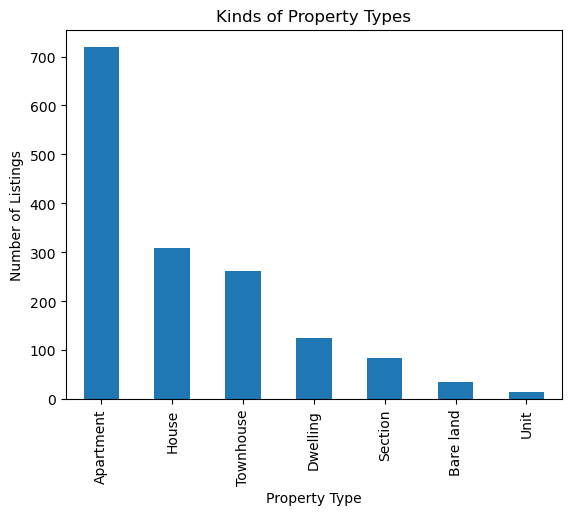

In [22]:
# Plot bar chart
counts_p.plot(kind='bar')
plt.title('Kinds of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Number of Listings')
plt.show()

In [24]:
# Filter 'House', 'Apartment', 'Townhouse' as Property types
HAT = ['House', 'Apartment', 'Townhouse']
df_HAT = df_p[df_p['PropertyType'].isin(HAT)]
# Calculate averge price for those Property types
avg_HAT = df_HAT.groupby('PropertyType')['Price'].mean()
print(avg_HAT)

PropertyType
Apartment    7.974477e+05
House        1.248431e+06
Townhouse    9.382208e+05
Name: Price, dtype: float64


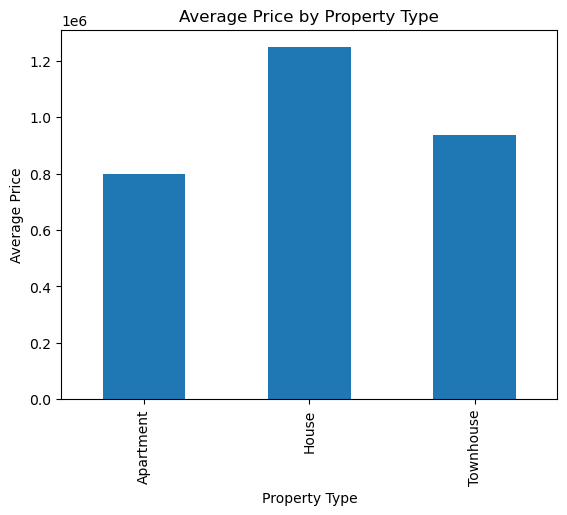

In [26]:
# Plot bar chart
avg_HAT.plot(kind='bar')

plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.show()

In [28]:
print(df_HAT['Suburb'].unique())

['Glen Innes' 'Northcote' 'Pukekohe' 'Epsom' 'City Centre' 'Orakei'
 'Meadowbank' 'Oneroa' 'Remuera' 'Ellerslie' 'Royal Oak' 'Glen Eden'
 'Otara' 'Greenlane' 'Silverdale' 'Onehunga' 'Albany' 'Takapuna'
 'Clarks Beach' 'Manurewa' 'Pokeno' 'Massey' 'Kaiaua' 'Awhitu' 'Grey Lynn'
 'Karaka' 'Glenbrook' 'Hillsborough' 'Mount Albert' 'Saint Heliers'
 'Waitakere' 'Mission Bay' 'West Harbour' 'Paerata' 'Mangere'
 'Stanmore Bay' 'Mangere Bridge' 'Mount Eden' 'Te Atatu South' 'Grafton'
 'Newmarket' 'Hobsonville' 'Eden Terrace' 'Birkenhead' 'Kohimarama'
 'Waiuku' 'Devonport' 'Avondale' 'Bayswater' 'Stanley Bay' 'Papatoetoe'
 'Mount Wellington' 'Mount Roskill' 'Saint Marys Bay' 'Sunnyvale'
 'Henderson' 'Onetangi' 'Tuakau' 'Westgate' 'Omiha' 'Freemans Bay'
 'Papakura' 'Patumahoe' 'Parnell' 'East Tamaki' 'Kingsland' 'Glenfield'
 'Red Hill' 'Kelston' 'Otahuhu' 'Glendowie' 'Wai O Taiki Bay' 'Takanini'
 'Herne Bay' 'Beach Haven' 'Albany Heights' 'Huapai' 'Stonefields'
 'Penrose' 'Highland Park']


In [30]:
counts_s = df_HAT['Suburb'].value_counts()
print(counts_s)

Suburb
City Centre      535
Pukekohe         107
Mount Albert      50
Henderson         46
Remuera           43
                ... 
Waitakere          1
Onehunga           1
Otara              1
Oneroa             1
Highland Park      1
Name: count, Length: 80, dtype: int64


In [32]:
# Drop the Suburb which counts less than 5
temp = counts_s[counts_s > 5].index
df_HAT = df_HAT[df_HAT['Suburb'].isin(temp)]
print(df_HAT['Suburb'].value_counts())

Suburb
City Centre         535
Pukekohe            107
Mount Albert         50
Henderson            46
Remuera              43
Eden Terrace         42
Mount Eden           31
Avondale             25
Takapuna             25
Te Atatu South       23
Northcote            23
Meadowbank           23
Grey Lynn            22
Sunnyvale            20
Orakei               15
Awhitu               13
Epsom                13
Grafton              12
Paerata              11
Penrose              11
Devonport            10
Ellerslie            10
Mount Wellington      9
Tuakau                9
Karaka                9
Mangere               7
Kaiaua                7
Massey                7
Newmarket             7
Silverdale            7
Waiuku                7
Greenlane             7
Glen Eden             7
Glenbrook             6
Albany                6
Name: count, dtype: int64


In [34]:
Avg_s = df_HAT.groupby('Suburb')['Price'].mean().sort_values(ascending=False)
Avg_s.isnull().values.any()

False

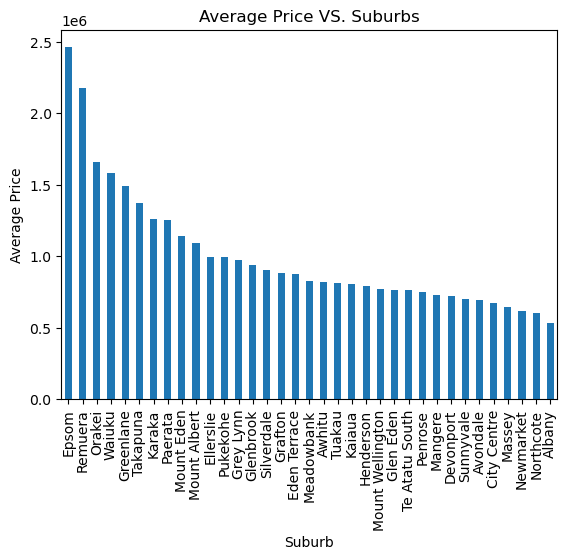

In [36]:
Avg_s.plot(kind='bar')
plt.title('Average Price VS. Suburbs')
plt.xlabel('Suburb')
plt.ylabel('Average Price')
plt.show()

In [40]:
# Seperate the dataframe by property type 
H = ['House']
df_H = df_p[df_p['PropertyType'].isin(H)].reset_index(drop=True)
df_H.head()

,Title,Suburb,Bedrooms,Bathrooms,LandArea,Price,PropertyType
0,5UQ0175A71QY39PN5WGJ,Glen Innes,3.0,1.0,781.0,1390000.0,House
1,Character home on a large 1152m2 section!!,Pukekohe,3.0,2.0,1152.0,859000.0,House
2,9NP4UW0RCG56TAMKJXS1,Pukekohe,3.0,2.0,664.0,795000.0,House
3,"""Love Life"" at 35 Hauraki Road",Oneroa,2.0,1.0,832.0,2455000.0,House
4,GY4IG5GTLL9LA925EM8E,Pukekohe,6.0,3.0,1556.0,1559000.0,House


In [44]:
T = ['Townhouse']
df_T = df_p[df_p['PropertyType'].isin(T)].reset_index(drop=True)
df_T.head()

,Title,Suburb,Bedrooms,Bathrooms,LandArea,Price,PropertyType
0,"Elegant, Exclusive & Well-Priced in DGZ",Remuera,4.0,3.0,664.0,1590000.0,Townhouse
1,FOR A LIMITED TIME ONLY,Ellerslie,2.0,2.0,664.0,885000.0,Townhouse
2,2U6MPQ36A2EHJ5W2VK0H,Pukekohe,3.0,1.0,664.0,785000.0,Townhouse
3,2KKWHSD23CBSE4J4GSVX,Remuera,3.0,2.0,664.0,1395000.0,Townhouse
4,8O5XQIWCLOSGGHAP8DBQ,Ellerslie,2.0,2.0,664.0,895000.0,Townhouse


In [48]:
A = ['Apartment']
df_A = df_p[df_p['PropertyType'].isin(A)].reset_index(drop=True)
df_A.head()

,Title,Suburb,Bedrooms,Bathrooms,LandArea,Price,PropertyType
0,JKW75TL80HBSWJY0U3VU,Northcote,1.0,1.0,664.0,509000.0,Apartment
1,D67Z3HKWSXRFDSAU48BP,Epsom,3.0,2.0,664.0,3150000.0,Apartment
2,2C0DMD1GDVLN56J4T6LU,City Centre,2.0,1.0,664.0,279000.0,Apartment
3,Z7J72E6MFHPZLMSI2ILE,City Centre,2.0,1.0,664.0,279000.0,Apartment
4,S2MO9LF5962WZMJRJXEQ,Orakei,2.0,2.0,664.0,1495000.0,Apartment


In [50]:
df_HAT.head()

,Title,Suburb,Bedrooms,Bathrooms,LandArea,Price,PropertyType
1,JKW75TL80HBSWJY0U3VU,Northcote,1.0,1.0,664.0,509000.0,Apartment
2,Character home on a large 1152m2 section!!,Pukekohe,3.0,2.0,1152.0,859000.0,House
3,D67Z3HKWSXRFDSAU48BP,Epsom,3.0,2.0,664.0,3150000.0,Apartment
4,9NP4UW0RCG56TAMKJXS1,Pukekohe,3.0,2.0,664.0,795000.0,House
5,2C0DMD1GDVLN56J4T6LU,City Centre,2.0,1.0,664.0,279000.0,Apartment


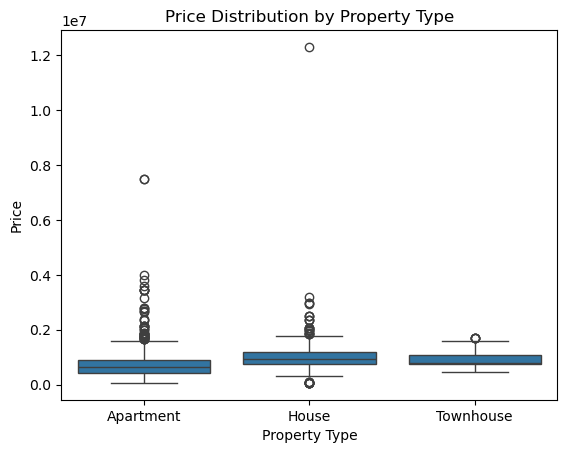

In [52]:
# Plot boxplot
sns.boxplot(x='PropertyType', y='Price', data=df_HAT)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

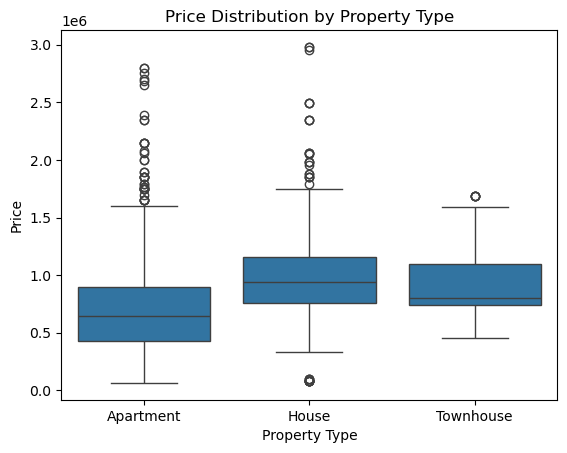

In [54]:
# Handle exterme outlier
df_HAT = df_HAT[df_HAT['Price'] < 3000000]
sns.boxplot(x='PropertyType', y='Price', data=df_HAT)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

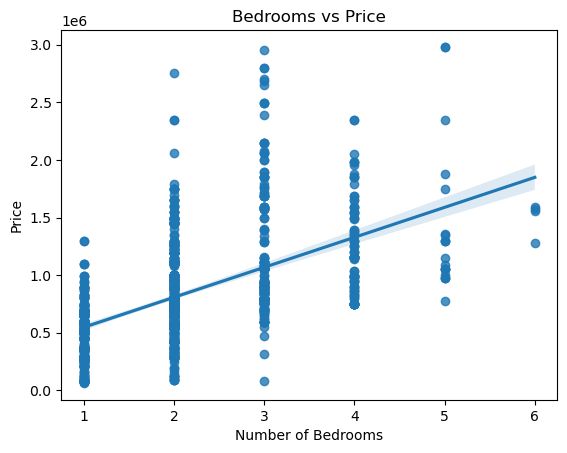

In [56]:
# Plot scatter plot for apartments, num. of bedroomes vs. price 
sns.regplot(x='Bedrooms', y='Price', data=df_HAT)
plt.title('Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

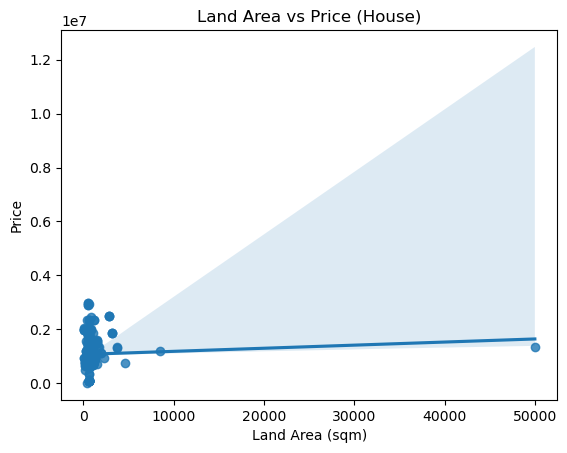

In [58]:
df_H = df_H[df_H['Price'] < 3000000]
sns.regplot(x='LandArea', y='Price', data=df_H)
plt.title('Land Area vs Price (House)')
plt.xlabel('Land Area (sqm)')
plt.ylabel('Price')
plt.show()

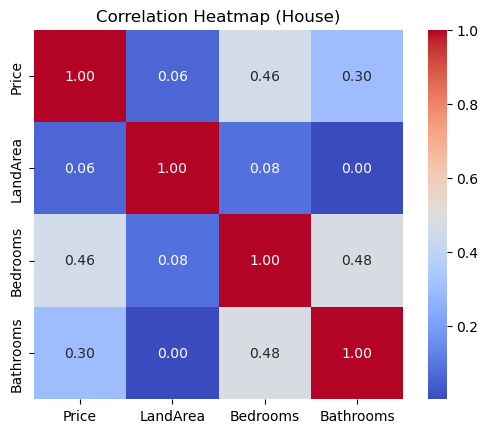

In [60]:
df_corr = df_H[['Price', 'LandArea', 'Bedrooms', 'Bathrooms']]
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap (House)')
plt.show()

In [62]:
# df_p overall data
# df_HAT house, apartment, townhouse combined
# df_H,A,T seperate

In [64]:
Avg_s = Avg_s.reset_index()
Avg_s.columns = ["Suburb", "avg_price"]
Avg_s.head()

,Suburb,avg_price
0,Epsom,2.459000e+06
1,Remuera,2.172488e+06
2,Orakei,1.658200e+06
3,Waiuku,1.583143e+06
4,Greenlane,1.492286e+06


In [66]:
df_HAT["PropertyTypeID"] = np.select(
    [df_HAT["PropertyType"] == "House", df_HAT["PropertyType"] == "Apartment", df_HAT["PropertyType"] == "Townhouse"], 
    [1, 2, 3])
df_HAT

,Title,Suburb,Bedrooms,Bathrooms,LandArea,Price,PropertyType,PropertyTypeID
1,JKW75TL80HBSWJY0U3VU,Northcote,1.0,1.0,664.0,509000.0,Apartment,2
2,Character home on a large 1152m2 section!!,Pukekohe,3.0,2.0,1152.0,859000.0,House,1
4,9NP4UW0RCG56TAMKJXS1,Pukekohe,3.0,2.0,664.0,795000.0,House,1
5,2C0DMD1GDVLN56J4T6LU,City Centre,2.0,1.0,664.0,279000.0,Apartment,2
6,Z7J72E6MFHPZLMSI2ILE,City Centre,2.0,1.0,664.0,279000.0,Apartment,2
...,...,...,...,...,...,...,...,...
1545,"Super Size 2Bed, 2Bath + 1 Cpk",City Centre,2.0,2.0,664.0,649000.0,Apartment,2
1546,Brand New City Home to Be Completed Soon,City Centre,1.0,1.0,664.0,720000.0,Apartment,2
1547,ZI2VS3XBFQAUPIHRXTH0,Eden Terrace,3.0,2.0,664.0,1290000.0,Apartment,2
1548,AO2LF9TMCTC4AH2Y2MJC,Pukekohe,6.0,4.0,1556.0,1574999.0,House,1


In [68]:
df_HAT_sorted = df_HAT.sort_values(by="Price", ascending=True).reset_index(drop=True)
df_HAT_sorted["Score"] = range(1,len(df_HAT) + 1)
df_HAT_sorted = df_HAT_sorted.sort_values(by="Price", ascending=False).reset_index(drop=True)
df_HAT_sorted.head()

,Title,Suburb,Bedrooms,Bathrooms,LandArea,Price,PropertyType,PropertyTypeID,Score
0,INAR1LBYU8UAQM0TBSFS,Remuera,5.0,4.0,522.0,2980000.0,House,1,1192
1,EUJMLNC6IIQALRON67J1,Remuera,5.0,4.0,522.0,2980000.0,House,1,1191
2,TK0FTJLLD4TGIE9FXXZ1,Remuera,3.0,2.0,664.0,2950000.0,House,1,1190
3,YL9GHZKEHVX2XKLMSH5T,City Centre,3.0,2.0,664.0,2799000.0,Apartment,2,1189
4,M5C8X4XYWBTCT9BU1D02,City Centre,3.0,2.0,664.0,2799000.0,Apartment,2,1188


In [70]:
suburb_score_CSA = df_HAT_sorted.groupby("Suburb", as_index=False).agg(Property_count=("Score", "count"), Score_sum=("Score", "sum"))
suburb_score_CSA = suburb_score_CSA.sort_values(by="Score_sum", ascending=False).reset_index(drop=True)
suburb_score_CSA["Score_avg"] = suburb_score_CSA["Score_sum"]/suburb_score_CSA["Property_count"]
suburb_score_CSA = suburb_score_CSA.sort_values(by="Score_avg", ascending=False).reset_index(drop=True)
suburb_score_CSA.head()

,Suburb,Property_count,Score_sum,Score_avg
0,Orakei,15,16795,1119.666667
1,Greenlane,7,7537,1076.714286
2,Remuera,38,40357,1062.026316
3,Paerata,11,10919,992.636364
4,Takapuna,25,24770,990.800000


In [72]:
df_HAT = df_HAT.drop(columns = ["avg_price"], errors = "ignore")
df_HAT = df_HAT.merge(Avg_s[["Suburb", "avg_price"]], on = "Suburb", how = "left")
df_HAT = df_HAT.drop(columns = ["Score_avg"], errors = "ignore")
df_HAT = df_HAT.merge(suburb_score_CSA[["Suburb", "Score_avg"]], on = "Suburb", how = "left")
df_HAT.head()

,Title,Suburb,Bedrooms,Bathrooms,LandArea,Price,PropertyType,PropertyTypeID,avg_price,Score_avg
0,JKW75TL80HBSWJY0U3VU,Northcote,1.0,1.0,664.0,509000.0,Apartment,2,606826.086957,370.434783
1,Character home on a large 1152m2 section!!,Pukekohe,3.0,2.0,1152.0,859000.0,House,1,996682.233645,787.065421
2,9NP4UW0RCG56TAMKJXS1,Pukekohe,3.0,2.0,664.0,795000.0,House,1,996682.233645,787.065421
3,2C0DMD1GDVLN56J4T6LU,City Centre,2.0,1.0,664.0,279000.0,Apartment,2,677115.676636,429.358349
4,Z7J72E6MFHPZLMSI2ILE,City Centre,2.0,1.0,664.0,279000.0,Apartment,2,677115.676636,429.358349


In [74]:
df_suburb_ref = df_HAT[['Suburb', 'Score_avg', 'avg_price']]
df_suburb_ref = df_suburb_ref.drop_duplicates(subset='Suburb') 
df_suburb_ref.to_csv('suburb_ref.csv', index=False)

In [76]:
#Single Regression Analysis (SRA)
x = df_HAT["Score_avg"].values.reshape(-1, 1) 
y = df_HAT["Price"].values.reshape(-1, 1)  
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [78]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test) 
y_pred = model.predict(x_scaled)

In [80]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R²:", r2)

Mean Absolute Error (MAE): 299978.3138867834
Mean Squared Error (MSE): 190501372369.95
Root Mean Squared Error (RMSE): 436464.6290021108
R²: 0.31406199572636595


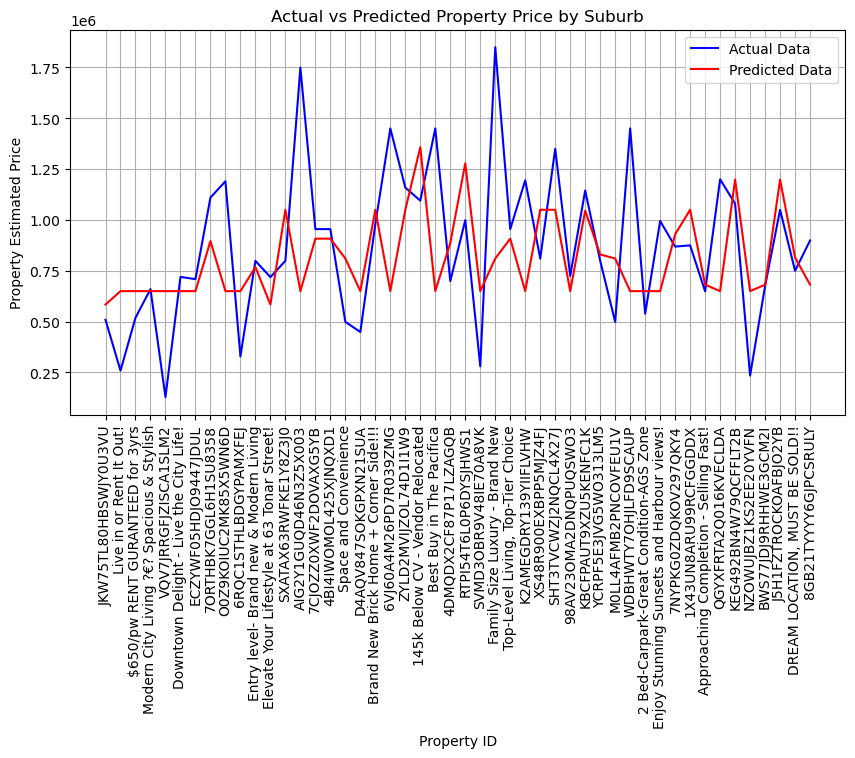

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(df_HAT["Title"].iloc[::25], y[::25], color="blue", label="Actual Data")
plt.plot(df_HAT["Title"].iloc[::25], y_pred[::25], color="red", label="Predicted Data")
plt.xlabel("Property ID")
plt.ylabel("Property Estimated Price")
plt.title("Actual vs Predicted Property Price by Suburb")
plt.xticks(rotation = 90)
plt.legend()
plt.grid()
plt.show()

In [83]:
#Cross Validation
cv_scores_linear = cross_val_score(model, x_scaled, y, cv=5, scoring='r2')
print("Linear Regression CV R² scores:", cv_scores_linear)
print("Linear Regression Average R²:", np.mean(cv_scores_linear))

Linear Regression CV R² scores: [0.3923819  0.32456524 0.19162682 0.21652954 0.17231898]
Linear Regression Average R²: 0.25948449482746005


In [86]:
#Single Regression Analysis (SRA)
x = df_HAT["Bedrooms"].values.reshape(-1, 1) 
y = df_HAT["Price"].values.reshape(-1, 1)  
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [88]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test) 
y_pred = model.predict(x_scaled)

In [90]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R²:", r2)

Mean Absolute Error (MAE): 326518.0403200907
Mean Squared Error (MSE): 194469855311.56
Root Mean Squared Error (RMSE): 440987.364117796
R²: 0.2997726851817861


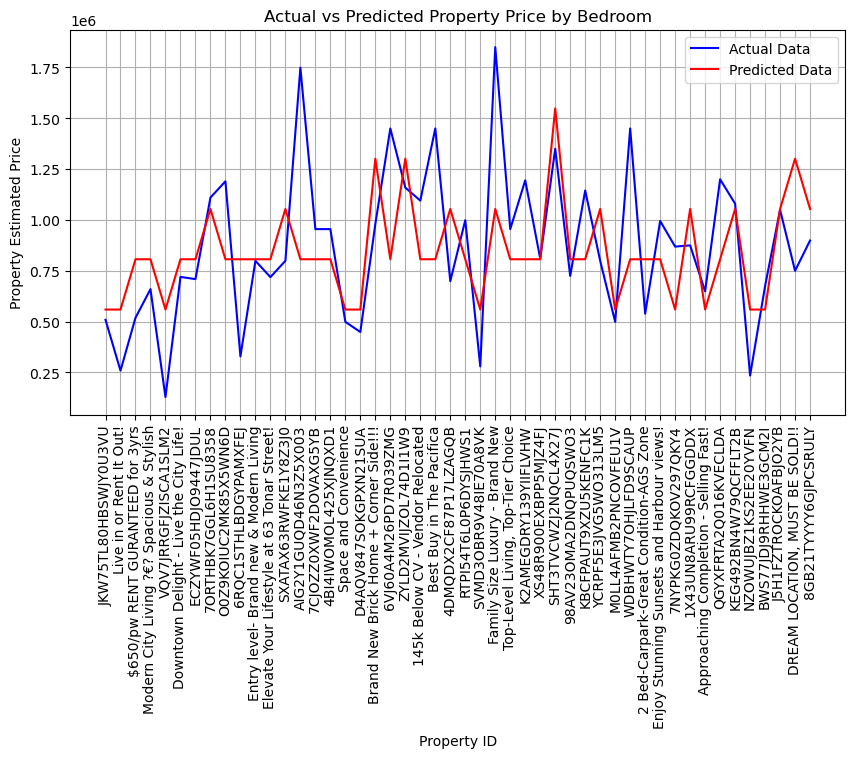

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(df_HAT["Title"].iloc[::25], y[::25], color="blue", label="Actual Data")
plt.plot(df_HAT["Title"].iloc[::25], y_pred[::25], color="red", label="Predicted Data")
plt.xlabel("Property ID")
plt.ylabel("Property Estimated Price")
plt.title("Actual vs Predicted Property Price by Bedroom")
plt.xticks(rotation = 90)
plt.legend()
plt.grid()
plt.show()

In [93]:
#Cross Validation
cv_scores_linear = cross_val_score(model, x_scaled, y, cv=5, scoring='r2')
print("Linear Regression CV R² scores:", cv_scores_linear)
print("Linear Regression Average R²:", np.mean(cv_scores_linear))

Linear Regression CV R² scores: [0.40527574 0.26977937 0.3160325  0.30215423 0.08341381]
Linear Regression Average R²: 0.27533112937891824


In [94]:
#Double Regression Analysis
x = df_HAT[["Bedrooms","Bathrooms"]]
y = df_HAT["Price"]
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [95]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test) 
y_pred = model.predict(x_scaled)

In [100]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R²:", r2)

Mean Absolute Error (MAE): 303415.6680150576
Mean Squared Error (MSE): 172018649558.51
Root Mean Squared Error (RMSE): 414751.3104964309
R²: 0.3806127078871361


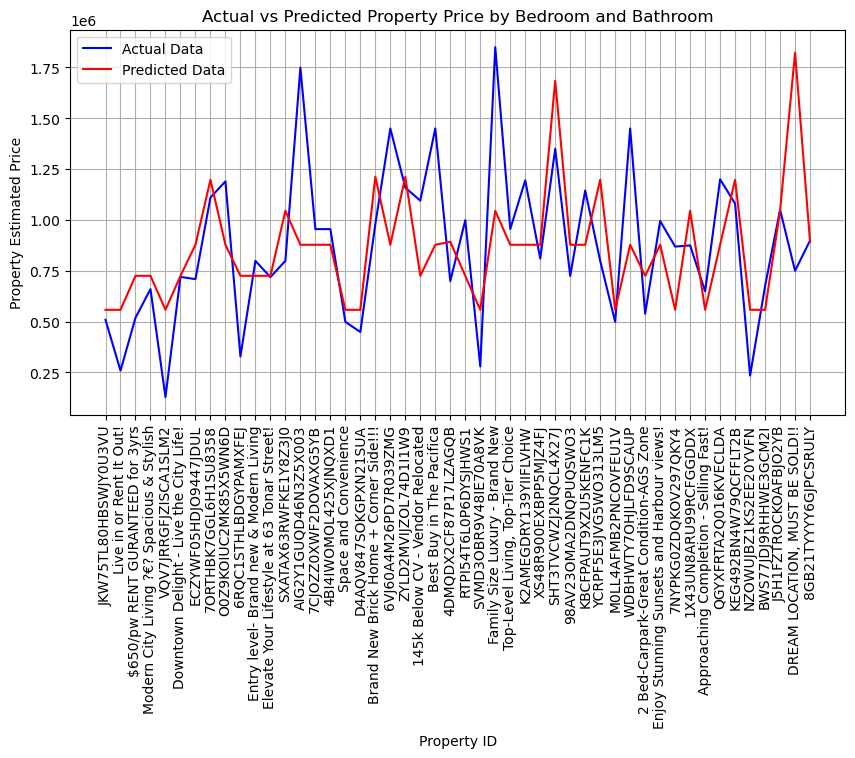

In [102]:
plt.figure(figsize=(10, 5))
plt.plot(df_HAT["Title"].iloc[::25], y[::25], color="blue", label="Actual Data")
plt.plot(df_HAT["Title"].iloc[::25], y_pred[::25], color="red", label="Predicted Data")
plt.xlabel("Property ID")
plt.ylabel("Property Estimated Price")
plt.title("Actual vs Predicted Property Price by Bedroom and Bathroom")
plt.xticks(rotation = 90)
plt.legend()
plt.grid()
plt.show()

In [103]:
#Cross Validation
cv_scores_linear = cross_val_score(model, x_scaled, y, cv=5, scoring='r2')
print("Linear Regression CV R² scores:", cv_scores_linear)
print("Linear Regression Average R²:", np.mean(cv_scores_linear))

Linear Regression CV R² scores: [ 0.50887593  0.36807892  0.38840266  0.34738466 -0.55109563]
Linear Regression Average R²: 0.2123293091748276


In [104]:
#Multiple Linear Regression(MLR)
x = df_HAT[["Bedrooms","Bathrooms","Score_avg"]]
y = df_HAT["Price"]
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [108]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test) 
y_pred = model.predict(x_scaled)

In [110]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R²:", r2)

Mean Absolute Error (MAE): 274795.4865580484
Mean Squared Error (MSE): 151651582262.38
Root Mean Squared Error (RMSE): 389424.68111610267
R²: 0.45394837639288677


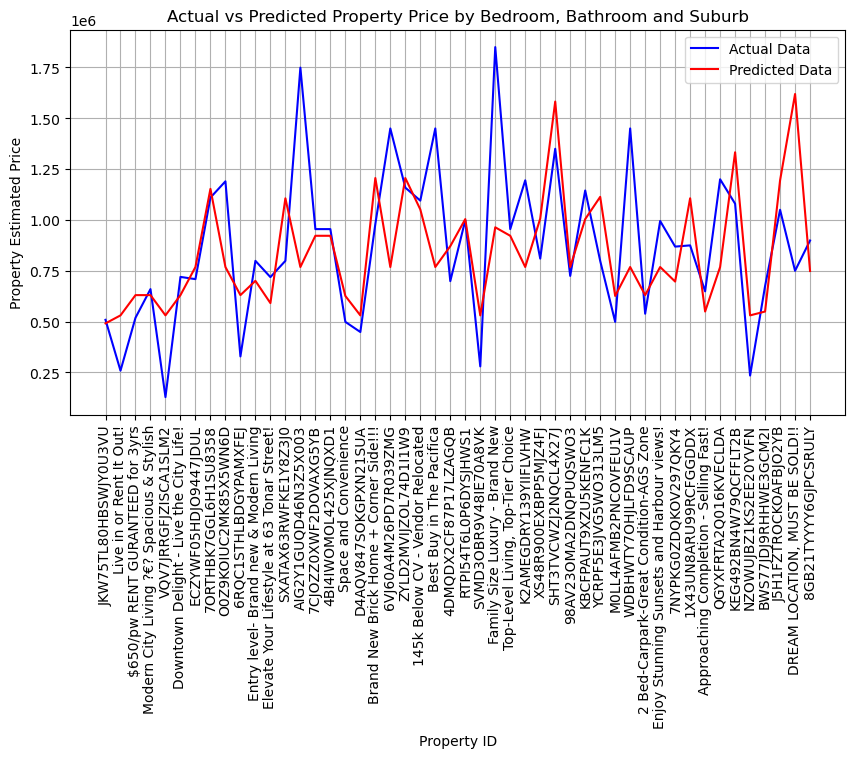

In [112]:
plt.figure(figsize=(10, 5))
plt.plot(df_HAT["Title"].iloc[::25], y[::25], color="blue", label="Actual Data")
plt.plot(df_HAT["Title"].iloc[::25], y_pred[::25], color="red", label="Predicted Data")
plt.xlabel("Property ID")
plt.ylabel("Property Estimated Price")
plt.title("Actual vs Predicted Property Price by Bedroom, Bathroom and Suburb")
plt.xticks(rotation = 90)
plt.legend()
plt.grid()
plt.show()

In [113]:
#Cross Validation
cv_scores_linear = cross_val_score(model, x_scaled, y, cv=5, scoring='r2')
print("Linear Regression CV R² scores:", cv_scores_linear)
print("Linear Regression Average R²:", np.mean(cv_scores_linear))

Linear Regression CV R² scores: [ 0.56654454  0.45817463  0.4006917   0.38585596 -0.25759278]
Linear Regression Average R²: 0.31073480993721503


In [116]:
#Multiple Linear Regression(MLR)
x = df_HAT[["Bedrooms","Bathrooms","Score_avg","avg_price"]]
y = df_HAT["Price"]
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [118]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test) 
y_pred = model.predict(x_scaled)

In [120]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R²:", r2)

Mean Absolute Error (MAE): 259689.47579585717
Mean Squared Error (MSE): 131938951225.62
Root Mean Squared Error (RMSE): 363234.0171647186
R²: 0.5249276172462193


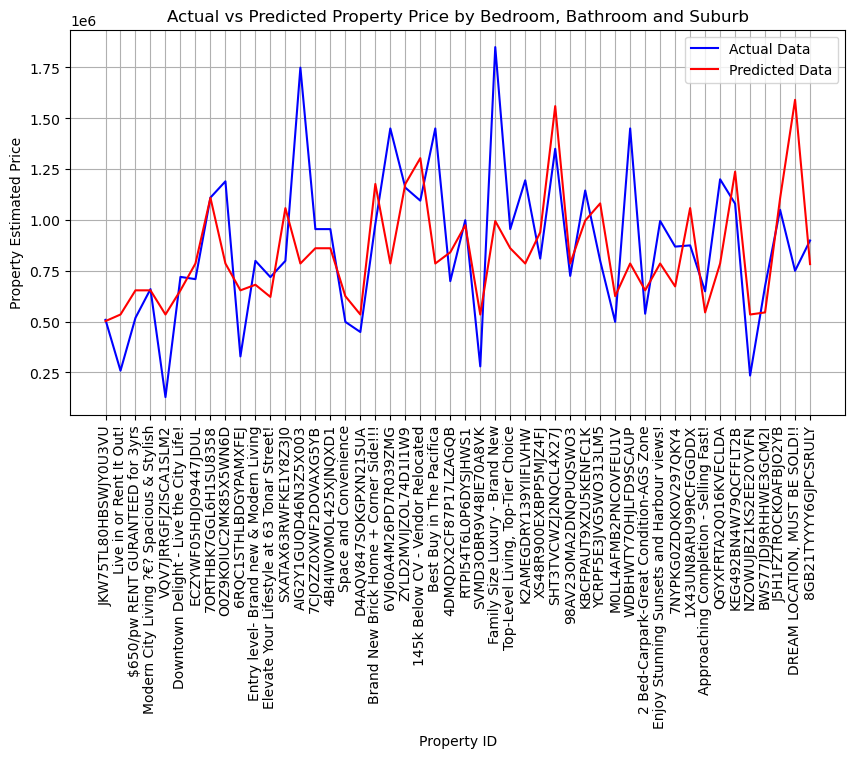

In [122]:
plt.figure(figsize=(10, 5))
plt.plot(df_HAT["Title"].iloc[::25], y[::25], color="blue", label="Actual Data")
plt.plot(df_HAT["Title"].iloc[::25], y_pred[::25], color="red", label="Predicted Data")
plt.xlabel("Property ID")
plt.ylabel("Property Estimated Price")
plt.title("Actual vs Predicted Property Price by Bedroom, Bathroom and Suburb")
plt.xticks(rotation = 90)
plt.legend()
plt.grid()
plt.show()

In [123]:
#Cross Validation
cv_scores_linear = cross_val_score(model, x_scaled, y, cv=5, scoring='r2')
print("Linear Regression CV R² scores:", cv_scores_linear)
print("Linear Regression Average R²:", np.mean(cv_scores_linear))

Linear Regression CV R² scores: [ 0.59885828  0.50983671  0.42170936  0.39536691 -0.16779208]
Linear Regression Average R²: 0.3515958375383924


In [124]:
#Multiple Linear Regression(MLR)
x = df_HAT[["Bedrooms","Bathrooms","Score_avg","avg_price","PropertyTypeID"]]
y = df_HAT["Price"]
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [128]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test) 
y_pred = model.predict(x_scaled)

In [130]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R²:", r2)

Mean Absolute Error (MAE): 259585.53663240036
Mean Squared Error (MSE): 133140064877.11
Root Mean Squared Error (RMSE): 364883.6319665643
R²: 0.5206027691322104


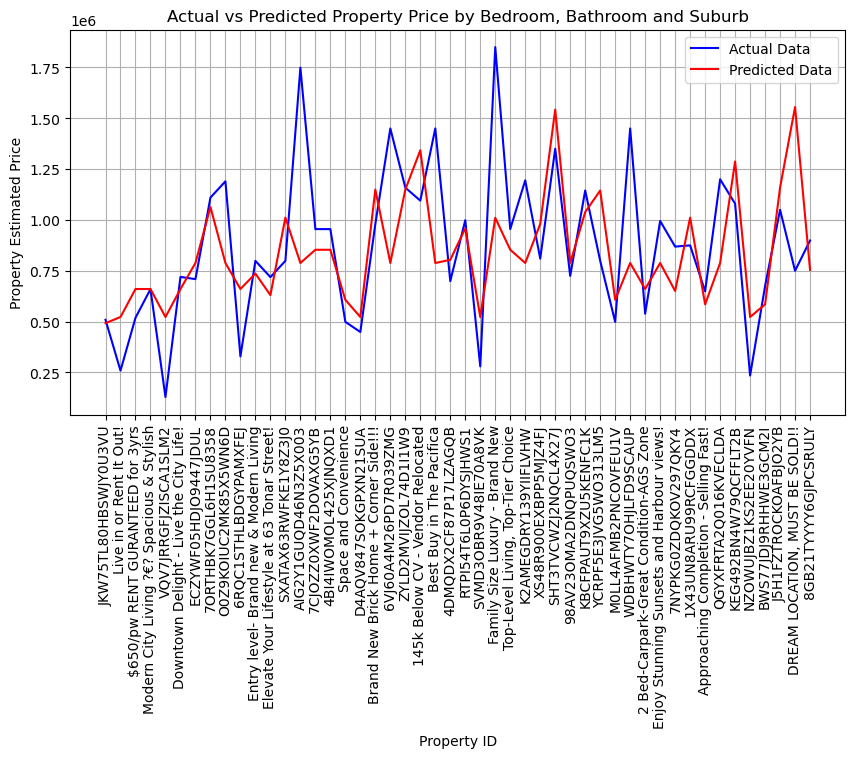

In [132]:
plt.figure(figsize=(10, 5))
plt.plot(df_HAT["Title"].iloc[::25], y[::25], color="blue", label="Actual Data")
plt.plot(df_HAT["Title"].iloc[::25], y_pred[::25], color="red", label="Predicted Data")
plt.xlabel("Property ID")
plt.ylabel("Property Estimated Price")
plt.title("Actual vs Predicted Property Price by Bedroom, Bathroom and Suburb")
plt.xticks(rotation = 90)
plt.legend()
plt.grid()
plt.show()

In [133]:
#Cross Validation
cv_scores_linear = cross_val_score(model, x_scaled, y, cv=5, scoring='r2')
print("Linear Regression CV R² scores:", cv_scores_linear)
print("Linear Regression Average R²:", np.mean(cv_scores_linear))

Linear Regression CV R² scores: [ 0.59197052  0.50974437  0.43046408  0.39119356 -0.15289342]
Linear Regression Average R²: 0.35409581980193


In [134]:
#Find the best k
k_range = range(1, 20)
r2_scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f"k = {k} → R² Score: {r2:.4f}")

k = 1 → R² Score: 0.4678
k = 2 → R² Score: 0.6086
k = 3 → R² Score: 0.6064
k = 4 → R² Score: 0.6206
k = 5 → R² Score: 0.5849
k = 6 → R² Score: 0.5801
k = 7 → R² Score: 0.5966
k = 8 → R² Score: 0.6014
k = 9 → R² Score: 0.6101
k = 10 → R² Score: 0.6028
k = 11 → R² Score: 0.6025
k = 12 → R² Score: 0.5969
k = 13 → R² Score: 0.5989
k = 14 → R² Score: 0.5975
k = 15 → R² Score: 0.5934
k = 16 → R² Score: 0.5919
k = 17 → R² Score: 0.5967
k = 18 → R² Score: 0.5893
k = 19 → R² Score: 0.5850


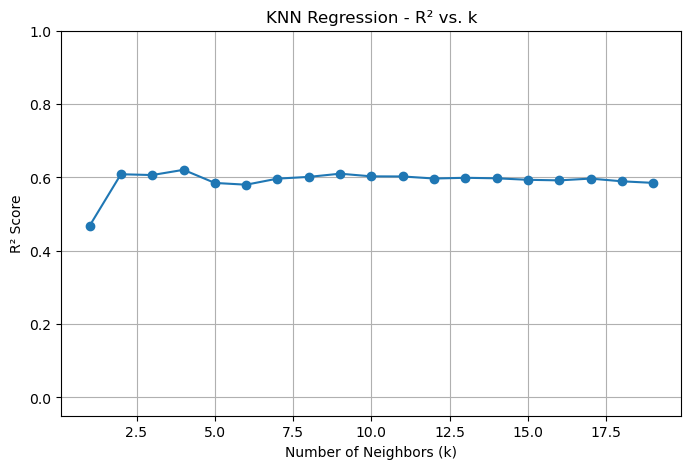

In [138]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, r2_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("R² Score")
plt.title("KNN Regression - R² vs. k")
plt.grid(True)
plt.ylim(-0.05, 1)
plt.show()

In [140]:
k_best = k_range[r2_scores.index(max(r2_scores))]
print("k_best:", k_best)
knn_final = KNeighborsRegressor(n_neighbors=k_best)
knn_final.fit(x_train, y_train)
y_knn_pred = knn_final.predict(x_test)
print("Best R²:", r2_score(y_test, y_knn_pred))

k_best: 4
Best R²: 0.6206329780583297


In [142]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

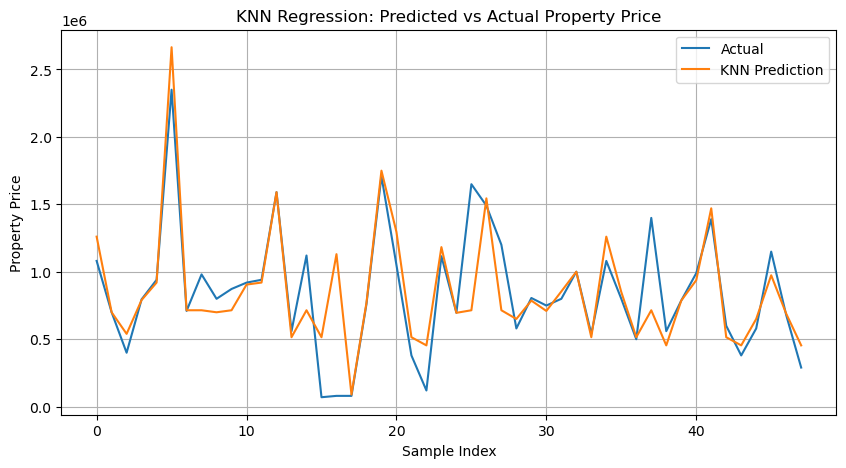

In [144]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[::5], label="Actual")
plt.plot(y_pred_knn[::5], label="KNN Prediction")
plt.title("KNN Regression: Predicted vs Actual Property Price")
plt.xlabel("Sample Index")
plt.ylabel("Property Price")
plt.legend()
plt.grid(True)
plt.show()

In [145]:
#Cross Validation
cv_scores_knn = cross_val_score(knn, x_scaled, y, cv=5, scoring='r2')
print("KNN Regression CV R² scores:", cv_scores_knn)
print("KNN Regression Average R²:", np.mean(cv_scores_knn))

KNN Regression CV R² scores: [ 0.23716624  0.42971658  0.30590175 -0.03155462  0.02649268]
KNN Regression Average R²: 0.19354452381065285


In [148]:
joblib.dump(knn_final, 'knn_best_model.pkl')

['knn_best_model.pkl']

In [150]:
#Using the twice polynomial eigen-transform
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [152]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [154]:
for d in range(1, 6):
    poly = PolynomialFeatures(degree=d, include_bias=False)
    x_poly = poly.fit_transform(x_train_scaled)
    x_test_poly = poly.transform(x_test_scaled)
    poly_model = LinearRegression()
    poly_model.fit(x_poly, y_train)
    y_poly_pred = poly_model.predict(x_test_poly)
    poly_mae = mean_absolute_error(y_test, y_poly_pred)
    poly_mse = mean_squared_error(y_test, y_poly_pred)
    poly_r2 = r2_score(y_test, y_poly_pred)
    print(f"Polynomial Regression MAE: {poly_mae:.2f}")
    print(f"Polynomial Regression MSE: {poly_mse:.2f}")
    print(f"Polynomial Regression R²: {poly_r2:.4f}")
    print("")

Polynomial Regression MAE: 259585.54
Polynomial Regression MSE: 133140064877.11
Polynomial Regression R²: 0.5206

Polynomial Regression MAE: 231889.87
Polynomial Regression MSE: 104111803652.65
Polynomial Regression R²: 0.6251

Polynomial Regression MAE: 214795.68
Polynomial Regression MSE: 104174647760.60
Polynomial Regression R²: 0.6249

Polynomial Regression MAE: 1767631.31
Polynomial Regression MSE: 167692526737064.81
Polynomial Regression R²: -602.8102

Polynomial Regression MAE: 11003166.30
Polynomial Regression MSE: 8448172109608144.00
Polynomial Regression R²: -30418.3206



In [156]:
#Generate polynomial features for complete x_scaled
for d in range(1, 6):
    poly = PolynomialFeatures(degree=d, include_bias=False)
    x_poly = poly.fit_transform(x_scaled)
    poly_model = LinearRegression()
    cv_scores_poly = cross_val_score(poly_model, x_poly, y, cv=5, scoring='r2')
    print("Polynomial Regression CV R² scores:", cv_scores_poly)
    print("Polynomial Regression Average R²:", np.mean(cv_scores_poly))
    print("")

Polynomial Regression CV R² scores: [ 0.59197052  0.50974437  0.43046408  0.39119356 -0.15289342]
Polynomial Regression Average R²: 0.35409581980193

Polynomial Regression CV R² scores: [0.44151534 0.57650817 0.51429865 0.42947536 0.47717062]
Polynomial Regression Average R²: 0.4877936272000839

Polynomial Regression CV R² scores: [-1.98074551  0.15341875  0.55066975  0.45730908 -0.25982839]
Polynomial Regression Average R²: -0.21583526428555455

Polynomial Regression CV R² scores: [-1.74391843e+06 -1.44709541e+03 -1.86802155e-01 -3.07726387e+02
 -7.13538068e+07]
Polynomial Regression Average R²: -14619896.051852945

Polynomial Regression CV R² scores: [-1.39391670e+04 -1.43575330e+04 -3.11298017e+00 -8.51382654e+02
 -2.73764522e+04]
Polynomial Regression Average R²: -11305.529565501636



### The best model achieved so far is kNN model with k = 4, Best R²: 0.6206329780583297